In [ ]:
import numpy as np
import matplotlib.pyplot as p
import audio_lib as audio

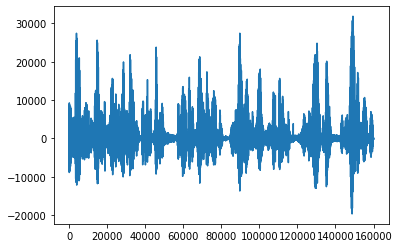

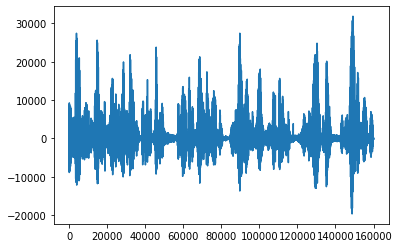

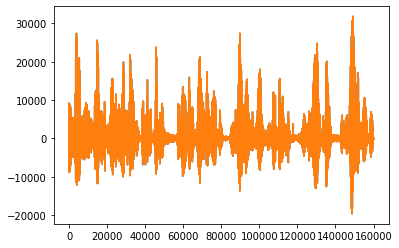

In [8]:
path1 = r'E:\dnn_denoising\data\test_data\synthetic\noise\clnsp126_3Wjw0nadnM4_snr15_tl-22_fileid_0.wav'
path2 = r'E:\dnn_denoising\data\test_data\synthetic\noise\clnsp126_3Wjw0nadnM4_snr15_tl-22_fileid_0.wav'

wav1, par1 = audio.open_wave(path1)
wav2, par2 = audio.open_wave(path2)

p.figure(1)
p.plot(wav1)
p.figure(2)
p.plot(wav2)
p.figure(3)
p.plot(wav1)
p.plot(wav2)

In [52]:
from utils import moving_average, SI_SNR
import sys
import numpy as np
import os
import tensorflow as tf
import scipy.io as sio
import model
from pathlib import Path
import datetime
import frontend

sess = tf.compat.v1.InteractiveSession()
# training config
settings = {}
#settings['model_selection']  = 'cnn_version_1'
#settings['model_selection']  = 'resnet_version_1'
settings['model_selection']  = 'complex_cnn_v2'


settings['dataset_path'] = r'F:\DNS\DNS-Challenge\datasets'
settings['clean_path'] = os.path.join(settings['dataset_path'], 'clean')
settings['noise_path'] = os.path.join(settings['dataset_path'], 'noise')

settings['train_percentage'] = 0.9

settings['batch_size'] = 4
settings['epoch'] = 20
settings['step_per_epoch'] = 1500
settings['step_val_per_epoch'] = 100

settings['init_learning_rate'] = 0.001
settings['learning_rate_decay'] = 0.85

settings['window_size_samples'] = 480
settings['window_stride_samples'] = 240
settings['snrs_train'] = [0,5,10]
settings['snrs_val'] = [10,15,20]

settings['use_reverb'] = False

Fs = 16000
clip_duration_ms = 31*1000
settings['desired_samples'] = int(Fs * clip_duration_ms / 1000)
settings['train_stft_time_len'] = 1+int((settings['desired_samples'] - settings['window_size_samples']) / settings['window_stride_samples'])

data_generator = frontend.DataGenerator_v2(settings)


In [58]:
x_train, y_train, noised_wav = data_generator.get_batch_data(settings['batch_size'], 
                                                         clean_percentage=0.0,
                                                         is_noise=True, is_reverb=settings['use_reverb'],
                                                         mode='train', sess=sess)

In [13]:
y_train.shape

(4, 495840)

10.987267272810575


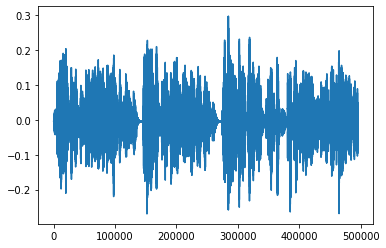

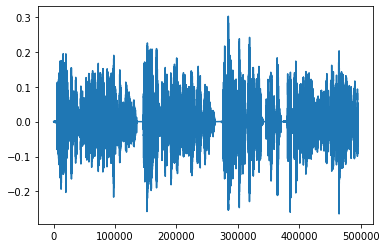

In [61]:
noised_wav = noised_wav[:,:495840]
m=2
p.figure(1)
p.plot(noised_wav[m])
p.figure(2)
p.plot(y_train[m])
loss_ = np.mean(np.abs(y_train[m] - noised_wav[m]))
# loss_ = 20*np.log(np.sum(np.abs(noised_wav[m]))/np.sum(np.abs(noised_wav[m]-y_train[m])))/np.log(10)
print(loss_)

In [10]:
s = np.round(y_train[3]*2**15).astype(np.int16)
audio.save_wave(s, par1, r'frontend_test.wav')